<a href="https://colab.research.google.com/github/Aneestk/Machine-learning-project/blob/main/news_hindi_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Sentiment Analysis Report:


,Title,Summary,Link,Sentiment
0,Nike's Knight: Not interested in buying Blazers,Nike co-founder Phil Knight said Wednesday he ...,https://www.espn.com/nba/story/_/id/45148274/p...,Negative
1,PSA: Apple Card Daily Cash Back From T-Mobile ...,Apple has partnered with multiple merchants to...,https://www.macrumors.com/2025/05/08/apple-car...,Neutral
2,Apple Card adds limited-time 6% Daily Cash pro...,Apple is launching a limited-time promotion in...,https://9to5mac.com/2025/05/12/apple-card-adds...,Positive
3,Limited-time Apple Card sign up bonus offers n...,"For a limited time, Apple is offering new Appl...",https://9to5mac.com/2025/05/24/apple-card-sign...,Positive
4,Natalia Bryant dons Kobe's iconic logo on USC ...,The eldest daughter of the Los Angeles Lakers ...,https://www.espn.com/nba/story/_/id/45211543/k...,Neutral
5,LEGO x Nike Air Max Dn bright yellow sneaker l...,LEGO x Nike Air Max Dn bright yellow sneaker l...,https://www.yankodesign.com/2025/05/28/lego-x-...,Positive
6,Apple Card promotion offers users 6% cash back...,Apple and Nike have released a new promotional...,https://appleinsider.com/articles/25/05/12/app...,Neutral
7,Nike Hypervenom Phantom RGN SE Soccer Cleats,How does a shoe combine nostalgic notes and mo...,https://uncrate.com/nike-hypervenom-phantom-rg...,Positive
8,Nike Kobe IX Elite High Protro Sneakers,Capable on the court but with unmissable style...,https://uncrate.com/nike-kobe-ix-elite-high-pr...,Positive
9,Nike’s Air Rift Black Swan takes flight with b...,Nike’s Air Rift Black Swan takes flight with b...,https://www.yankodesign.com/2025/05/16/nikes-a...,Positive



 Comparative Analysis:


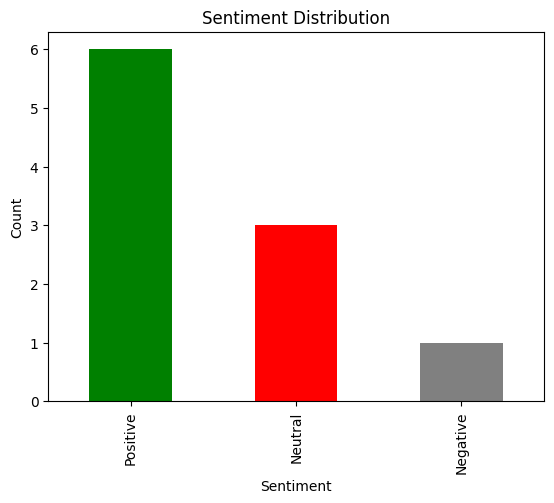


 Summary Text (English):
Nike co-founder Phil Knight said Wednesday he is not interested in buying the Trail Blazers. Apple has partnered with multiple merchants to provide three percent Daily Cash back for Apple Card purchases, and T-Mobile has participated in the program since 2019. That's going to end in July, though, and Daily Cash back from T-Mobile will revert to the s… Apple is launching a limited-time promotion in partnership with Nike. In an email today, the company revealed that Apple Card users can store 6% Daily Cash rewards on purchases at Nike through June 15. 



 more… For a limited time, Apple is offering new Apple Card users a special sign up bonus through Nike. Now through June 15th, users can receive $150 in cash back after spending over $150 on Nike purchases in the first 30 days of account opening. 



This stacks on … The eldest daughter of the Los Angeles Lakers legend graduated from USC's School of Cinematic Arts. LEGO x Nike Air Max Dn bright yellow sneaker l

In [7]:
#Step 1: Install Required Libraries
!pip install -q gtts langdetect vaderSentiment deep-translator matplotlib

# Step 2: Import Libraries
import pandas as pd
import requests
from gtts import gTTS
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from IPython.display import Audio, display

#Step 3: Initialize Tools
analyzer = SentimentIntensityAnalyzer()
translator = GoogleTranslator(source="auto", target="hi")

#Step 4: Function to Fetch News Articles
def get_news_articles(company_name, newsapi_key, gnews_key):
    articles = []

    url_newsapi = f"https://newsapi.org/v2/everything?q={company_name}&language=en&apiKey={newsapi_key}"
    response = requests.get(url_newsapi)
    if response.status_code == 200:
        data = response.json()
        for article in data["articles"]:
            if detect(article["title"]) == "en":
                articles.append({
                    "Title": article["title"],
                    "Summary": article.get("description", "No Summary"),
                    "Link": article["url"]
                })

    url_gnews = f"https://gnews.io/api/v4/search?q={company_name}&lang=en&token={gnews_key}"
    response = requests.get(url_gnews)
    if response.status_code == 200:
        data = response.json()
        for article in data["articles"]:
            if detect(article["title"]) == "en":
                articles.append({
                    "Title": article["title"],
                    "Summary": article.get("description", "No Summary"),
                    "Link": article["url"]
                })

    return pd.DataFrame(articles[:10])

#Step 5: Sentiment Analysis Function
def get_sentiment(text):
    if not text or text.strip() == "":
        return "Neutral"
    score = analyzer.polarity_scores(text)["compound"]
    return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

# Step 6: Plotting Sentiment Bar Chart
def comparative_analysis(df):
    sentiment_counts = df["Sentiment"].value_counts()
    sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# Step 7: Hindi Text-to-Speech
def text_to_speech(text):
    tts = gTTS(text=text, lang="hi", slow=False)
    filename = "summary.mp3"
    tts.save(filename)
    return filename

# Step 8: Translate to Hindi
def translate_text(text, target_lang="hi"):
    return GoogleTranslator(source="auto", target=target_lang).translate(text)

# Step 9: Set Keys and Run
company_name = "nike"
newsapi_key = "f21d0549ad9d40c29428410f82435ebf"
gnews_key = "b7817fed7762c5ed2bd4cea506c5e049"

df = get_news_articles(company_name, newsapi_key, gnews_key)

if df.empty:
    print(" No articles found.")
else:
    df["Sentiment"] = df["Summary"].apply(get_sentiment)
    print(" Sentiment Analysis Report:")
    display(df)

    print("\n Comparative Analysis:")
    comparative_analysis(df)

    summary_text = " ".join(df["Summary"].tolist())
    print("\n Summary Text (English):")
    print(summary_text)

    translated_summary = translate_text(summary_text, target_lang="hi")
    print("\n Translated Summary Text (Hindi):")
    print(translated_summary)

    print("\n Playing Hindi Audio Summary:")
    audio_file = text_to_speech(translated_summary)
    display(Audio(audio_file))
